In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_data.csv', index_col=False)

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<AxesSubplot:>

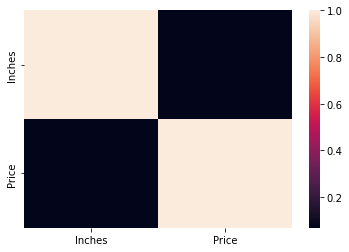

In [9]:
sns.heatmap(df.corr())

Data Exploration & Feature Engineering

In [10]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [11]:
sns.set_style('whitegrid')

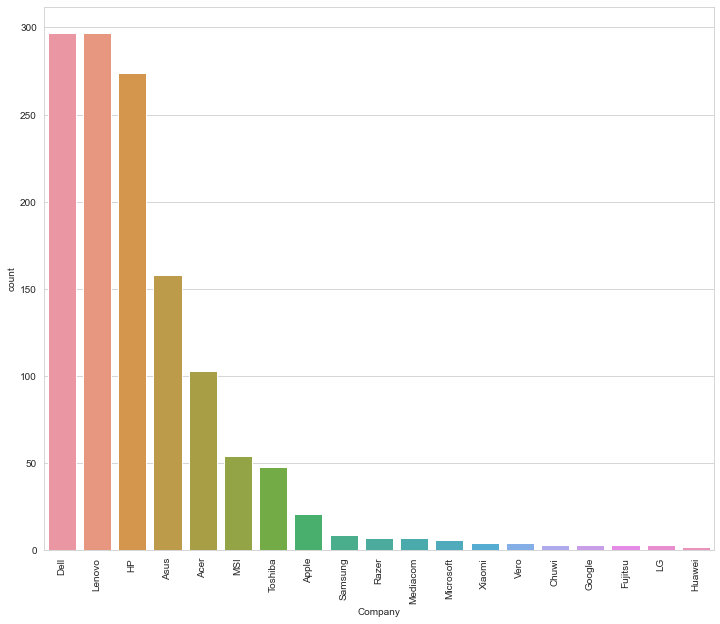

In [12]:
plt.figure(figsize=(12,10))
ax = sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [13]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

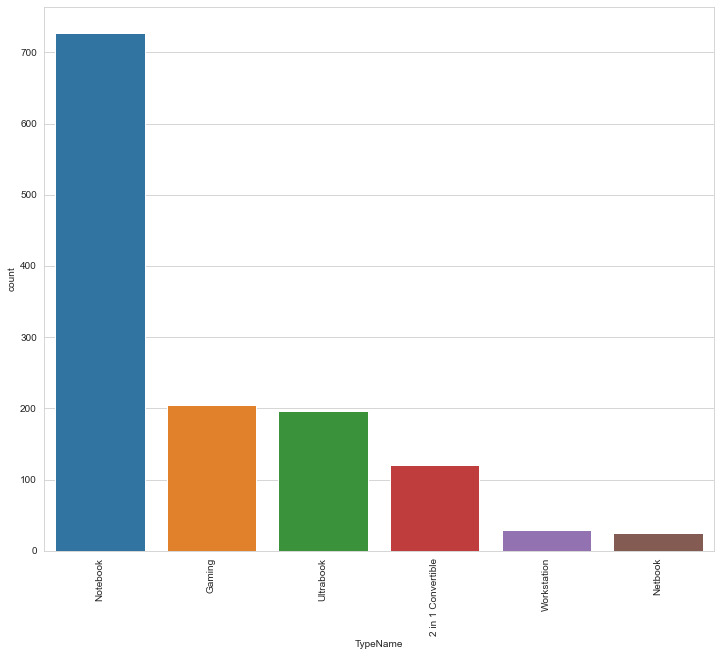

In [14]:
plt.figure(figsize=(12,10))
ax = sns.countplot(data=df, x = 'TypeName', order=df['TypeName'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

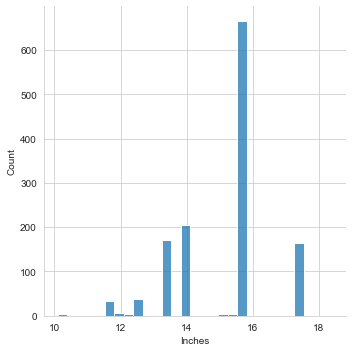

In [15]:
sns.displot(data=df, x='Inches')

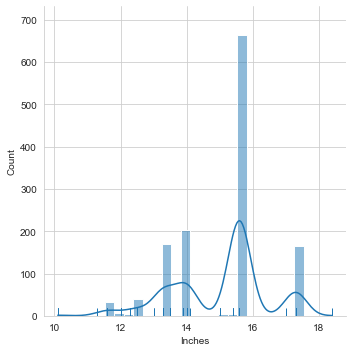

In [16]:
sns.displot(data=df, x='Inches', kde=True, rug=True)

In [17]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

<AxesSubplot:>

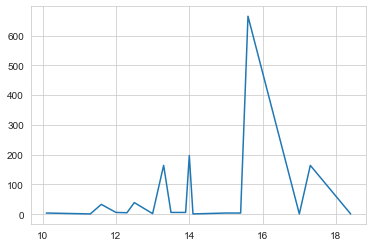

In [18]:
df['Inches'].value_counts().sort_index().plot()

In [19]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [20]:
df['ScreenResolution'].str.extract(r'(^([a-zA-Z /4+])+)')[0].value_counts()

Full HD                                 507
IPS Panel Full HD                       235
IPS Panel Full HD / Touchscreen          53
Full HD / Touchscreen                    47
Touchscreen                              32
IPS Panel Retina Display                 17
Quad HD+ / Touchscreen                   15
IPS Panel Touchscreen                    13
IPS Panel 4K Ultra HD                    12
IPS Panel 4K Ultra HD / Touchscreen      11
IPS Panel                                11
4K Ultra HD / Touchscreen                10
4K Ultra HD                               7
IPS Panel Quad HD+ / Touchscreen          6
IPS Panel Quad HD+                        5
Quad HD+                                  3
IPS Panel Touchscreen / 4K Ultra HD       2
Touchscreen / Quad HD+                    1
Touchscreen / Full HD                     1
Touchscreen / 4K Ultra HD                 1
Name: 0, dtype: int64

In [21]:
df['ScreenResolution'].str.extract(r'(([0-9 x])+)$')[0].value_counts()

 1920x1080    838
1366x768      281
 3840x2160     43
 1366x768      27
 3200x1800     27
1600x900       23
 2560x1440     20
 2256x1504      6
 2560x1600      6
 2304x1440      6
 1920x1200      5
1440x900        4
 2880x1800      4
 2400x1600      4
2560x1440       3
1920x1080       3
 2160x1440      2
 2736x1824      1
Name: 0, dtype: int64

In [22]:
df['Cpu'].str.extract(r'([a-z A-Z 0-9 \- \&]+(?=( [0-9]+(|\.[0-9]{1,2})GHz)))')

,0,1,2
0,Intel Core i5,2.3GHz,.3
1,Intel Core i5,1.8GHz,.8
2,Intel Core i5 7200U,2.5GHz,.5
3,Intel Core i7,2.7GHz,.7
4,Intel Core i5,3.1GHz,.1
...,...,...,...
1298,Intel Core i7 6500U,2.5GHz,.5
1299,Intel Core i7 6500U,2.5GHz,.5
1300,Intel Celeron Dual Core N3050,1.6GHz,.6
1301,Intel Core i7 6500U,2.5GHz,.5


In [23]:
df['DisplayType'] = df['ScreenResolution'].str.extract(r'(^([a-zA-Z /4+])+)')[0]

In [24]:
df['DisplayResolution'] = df['ScreenResolution'].str.extract(r'(([0-9 x]+)$)')[0]

In [25]:
df['TouchScreen'] = df['DisplayType'].str.contains('Touchscreen')

In [27]:
#list(df['Cpu'].value_counts().index)

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,DisplayType,DisplayResolution,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,NaN,1440x900,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,IPS Panel Retina Display,2880x1800,False
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,IPS Panel Retina Display,2560x1600,False


In [29]:
### Extracting CPU Name and Range from CPU column...

In [30]:
df[['Cpu Type', 'Cpu Power']] = df['Cpu'].str.extract(r'([a-z A-Z 0-9 \- \&]+(?=( [0-9]+(|\.[0-9]{1,2})GHz)))')[[0,1]]

In [31]:
# ( +[A-Z0-9]+$) 2nd apply

In [33]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,DisplayType,DisplayResolution,TouchScreen,Cpu Type,Cpu Power
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,False,Intel Core i5,2.3GHz
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,NaN,1440x900,NaN,Intel Core i5,1.8GHz
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080,False,Intel Core i5 7200U,2.5GHz


In [34]:
df['Cpu Type'] = df['Cpu Type'].str.replace(r'( +[A-Za-z0-9\-]{3,8})$', '')
# using this replace [regex pattern], we can find the generation and write a logic for it...

/var/folders/12/ztwysxfn0knb0pl6wlzd08fm0000gq/T/ipykernel_57262/4203668547.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cpu Type'] = df['Cpu Type'].str.replace(r'( +[A-Za-z0-9\-]{3,8})$', '')


In [35]:
df['Cpu Type']

0                 Intel Core i5
1                 Intel Core i5
2                 Intel Core i5
3                 Intel Core i7
4                 Intel Core i5
                 ...           
1298              Intel Core i7
1299              Intel Core i7
1300    Intel Celeron Dual Core
1301              Intel Core i7
1302    Intel Celeron Dual Core
Name: Cpu Type, Length: 1303, dtype: object

In [36]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,DisplayType,DisplayResolution,TouchScreen,Cpu Type,Cpu Power
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,False,Intel Core i5,2.3GHz
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,NaN,1440x900,NaN,Intel Core i5,1.8GHz
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080,False,Intel Core i5,2.5GHz


In [37]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [38]:
storage_pattern = r'([A-Z a-z0-9\-\.]+SSD)|([A-Z a-z0-9\-\.]+HDD)|([A-Z a-z0-9\-\.]+Flash Storage)|([A-Z a-z0-9\-\.]+Hybrid)'

In [39]:
# storage_df = df['Memory'].str.extract(r'([A-Z a-z0-9\-\.]+SSD)|([A-Z a-z0-9\-\.]+HDD)|([A-Z a-z0-9\-\.]+Flash Storage)|([A-Z a-z0-9\-\.]+Hybrid)')
storage_df = (df['Memory'].str.extractall(storage_pattern)).groupby(level=0).first()

In [41]:
# storage_df.loc[1247]['HDD']

In [42]:
df.loc[1247]

Company                                     Asus
TypeName                                  Gaming
Inches                                      15.6
ScreenResolution     IPS Panel Full HD 1920x1080
Cpu                  Intel Core i7 6700HQ 2.6GHz
Ram                                         16GB
Memory                      256GB SSD +  1TB HDD
Gpu                      Nvidia GeForce GTX 1070
OpSys                                 Windows 10
Weight                                    2.34kg
Price                                   123876.0
DisplayType                   IPS Panel Full HD 
DisplayResolution                      1920x1080
TouchScreen                                False
Cpu Type                           Intel Core i7
Cpu Power                                 2.6GHz
Name: 1247, dtype: object

In [43]:
storage_df.rename(columns={0:'SSD', 1: 'HDD', 2: 'Flash Storage', 3: 'Hybrid'}, inplace=True)

In [44]:
storage_df.loc[1247]

SSD              256GB SSD
HDD                1TB HDD
Flash Storage         None
Hybrid                None
Name: 1247, dtype: object

In [45]:
df.loc[1247]

Company                                     Asus
TypeName                                  Gaming
Inches                                      15.6
ScreenResolution     IPS Panel Full HD 1920x1080
Cpu                  Intel Core i7 6700HQ 2.6GHz
Ram                                         16GB
Memory                      256GB SSD +  1TB HDD
Gpu                      Nvidia GeForce GTX 1070
OpSys                                 Windows 10
Weight                                    2.34kg
Price                                   123876.0
DisplayType                   IPS Panel Full HD 
DisplayResolution                      1920x1080
TouchScreen                                False
Cpu Type                           Intel Core i7
Cpu Power                                 2.6GHz
Name: 1247, dtype: object

In [46]:
# pd.merge(df, storage_df, left_index=True, right_index=True)

In [47]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [48]:
df_joined = df.join(storage_df)

In [49]:
df_joined.loc[1247]

Company                                     Asus
TypeName                                  Gaming
Inches                                      15.6
ScreenResolution     IPS Panel Full HD 1920x1080
Cpu                  Intel Core i7 6700HQ 2.6GHz
Ram                                         16GB
Memory                      256GB SSD +  1TB HDD
Gpu                      Nvidia GeForce GTX 1070
OpSys                                 Windows 10
Weight                                    2.34kg
Price                                   123876.0
DisplayType                   IPS Panel Full HD 
DisplayResolution                      1920x1080
TouchScreen                                False
Cpu Type                           Intel Core i7
Cpu Power                                 2.6GHz
SSD                                    256GB SSD
HDD                                      1TB HDD
Flash Storage                               None
Hybrid                                      None
Name: 1247, dtype: o

In [50]:
df_joined['SSD'].value_counts()

256GB SSD    500
128GB SSD    172
512GB SSD    138
1TB SSD       16
32GB SSD       6
180GB SSD      5
16GB SSD       3
64GB SSD       1
240GB SSD      1
8GB SSD        1
Name: SSD, dtype: int64

In [51]:
df_joined['HDD'].value_counts()

1TB HDD        224
  1TB HDD      184
500GB HDD      132
2TB HDD         16
  2TB HDD       15
  500GB HDD      2
32GB HDD         1
128GB HDD        1
1.0TB HDD        1
Name: HDD, dtype: int64

In [52]:
df_joined['Flash Storage'].value_counts()

32GB Flash Storage     38
64GB Flash Storage     16
256GB Flash Storage     8
16GB Flash Storage      7
128GB Flash Storage     4
512GB Flash Storage     2
Name: Flash Storage, dtype: int64

In [53]:
df_joined['Hybrid'].value_counts()

1.0TB Hybrid      9
  1.0TB Hybrid    2
508GB Hybrid      1
Name: Hybrid, dtype: int64

In [54]:
df_joined.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,DisplayType,DisplayResolution,TouchScreen,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,IPS Panel Retina Display,2560x1600,False,Intel Core i5,2.3GHz,128GB SSD,None,None,None
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,NaN,1440x900,NaN,Intel Core i5,1.8GHz,None,None,128GB Flash Storage,None
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Full HD,1920x1080,False,Intel Core i5,2.5GHz,256GB SSD,None,None,None


In [55]:
# df_joined['SSD'] = df_joined['SSD'].str.replace('TB', '000GB')

In [56]:
# df_joined['SSD'].value_counts()

In [57]:
df_joined['SSD'] = df_joined['SSD'].apply(lambda x: str.strip(x) if x is not None else x).str.split(' ').str.get(0)

In [58]:
# df_joined['SSD'].str.extract(r'([0-9\.]+)+(GB|TB)').map(lambda x: x if x)

In [59]:
df_joined['SSD']

0       128GB
1        None
2       256GB
3       512GB
4       256GB
        ...  
1298    128GB
1299    512GB
1300     None
1301     None
1302     None
Name: SSD, Length: 1303, dtype: object

In [60]:
def replace_gb_tb(val):
    if pd.isna(val):
        return val
    elif 'GB' in val:
        return float(val.replace('GB', ''))
    elif 'TB' in val:
        val2 = val.replace('TB', '')
        return float(val2)*1000.0

In [61]:
df_joined['SSD'] = df_joined['SSD'].apply(lambda x: replace_gb_tb(x))

In [62]:
df_joined['SSD'].value_counts()

256.0     500
128.0     172
512.0     138
1000.0     16
32.0        6
180.0       5
16.0        3
64.0        1
240.0       1
8.0         1
Name: SSD, dtype: int64

In [63]:
df_joined['HDD'] = df_joined['HDD'].apply(lambda x: str.strip(x) if x is not None else x).str.split(' ').str.get(0)

In [64]:
df_joined['HDD'] = df_joined['HDD'].apply(lambda x: replace_gb_tb(x))

In [65]:
# df_joined['HDD'] = df_joined['HDD'].str.replace('TB', '000GB')

In [66]:
df_joined['HDD'].value_counts()

1000.0    409
500.0     134
2000.0     31
32.0        1
128.0       1
Name: HDD, dtype: int64

In [67]:
df_joined['Flash Storage'] = df_joined['Flash Storage'].apply(lambda x: str.strip(x) if x is not None else x).str.split(' ').str.get(0)

In [68]:
df_joined['Flash Storage'] = df_joined['Flash Storage'].apply(lambda x: replace_gb_tb(x))

In [69]:
storage_df.iloc[1075]

SSD                   None
HDD              1.0TB HDD
Flash Storage         None
Hybrid                None
Name: 1075, dtype: object

In [70]:
df_joined['Hybrid'] = df_joined['Hybrid'].apply(lambda x: str.strip(x) if x is not None else x).str.split(' ').str.get(0)

In [71]:
df_joined['Hybrid'] = df_joined['Hybrid'].apply(lambda x: replace_gb_tb(x))

In [72]:
df_joined['Hybrid'].value_counts()

1000.0    11
508.0      1
Name: Hybrid, dtype: int64

In [73]:
df_joined.loc[1247]

Company                                     Asus
TypeName                                  Gaming
Inches                                      15.6
ScreenResolution     IPS Panel Full HD 1920x1080
Cpu                  Intel Core i7 6700HQ 2.6GHz
Ram                                         16GB
Memory                      256GB SSD +  1TB HDD
Gpu                      Nvidia GeForce GTX 1070
OpSys                                 Windows 10
Weight                                    2.34kg
Price                                   123876.0
DisplayType                   IPS Panel Full HD 
DisplayResolution                      1920x1080
TouchScreen                                False
Cpu Type                           Intel Core i7
Cpu Power                                 2.6GHz
SSD                                        256.0
HDD                                       1000.0
Flash Storage                                NaN
Hybrid                                       NaN
Name: 1247, dtype: o

In [74]:
# we can have a list of labels based on the performance of these GPUs and label then accodingly.
list(df_joined['Gpu'].value_counts().index)

['Intel HD Graphics 620',
 'Intel HD Graphics 520',
 'Intel UHD Graphics 620',
 'Nvidia GeForce GTX 1050',
 'Nvidia GeForce GTX 1060',
 'Nvidia GeForce 940MX',
 'AMD Radeon 530',
 'Intel HD Graphics 500',
 'Intel HD Graphics 400',
 'Nvidia GeForce GTX 1070',
 'Intel HD Graphics',
 'Nvidia GeForce GTX 1050 Ti',
 'AMD Radeon R5 M430',
 'Nvidia GeForce 930MX',
 'AMD Radeon 520',
 'Nvidia GeForce MX150',
 'Intel HD Graphics 515',
 'Intel HD Graphics 615',
 'AMD Radeon R7 M445',
 'Nvidia GeForce GTX 960M',
 'Nvidia GeForce 920MX',
 'Intel HD Graphics 505',
 'AMD Radeon R5',
 'Nvidia GeForce GTX 980M',
 'Intel HD Graphics 405',
 'Nvidia Quadro M1200',
 'AMD Radeon R5 M420',
 'Intel Iris Plus Graphics 640',
 'Nvidia GeForce GTX 950M',
 'AMD Radeon R5 M330',
 'Nvidia GeForce 920M',
 'Nvidia GeForce GTX 1080',
 'Nvidia GeForce 930M',
 'Nvidia GeForce MX130',
 'Nvidia GeForce 930MX ',
 'Nvidia Quadro M620',
 'Intel HD Graphics 6000',
 'AMD Radeon R7 M440',
 'Nvidia GeForce 920MX ',
 'Nvidia GeFo

In [75]:
# label encoding...
df_joined['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [76]:
df_joined['Weight'] = df_joined['Weight'].str.replace('kg', '').astype('float')

In [77]:
df_joined

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,DisplayType,DisplayResolution,TouchScreen,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS Panel Retina Display,2560x1600,False,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,NaN,1440x900,NaN,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Full HD,1920x1080,False,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS Panel Retina Display,2880x1800,False,Intel Core i7,2.7GHz,512.0,NaN,NaN,NaN
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS Panel Retina Display,2560x1600,False,Intel Core i5,3.1GHz,256.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,IPS Panel Full HD / Touchscreen,1920x1080,True,Intel Core i7,2.5GHz,128.0,NaN,NaN,NaN
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,IPS Panel Quad HD+ / Touchscreen,3200x1800,True,Intel Core i7,2.5GHz,512.0,NaN,NaN,NaN
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,NaN,1366x768,NaN,Intel Celeron Dual Core,1.6GHz,NaN,NaN,64.0,NaN
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,NaN,1366x768,NaN,Intel Core i7,2.5GHz,NaN,1000.0,NaN,NaN


In [78]:
df_joined['Price']

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [79]:
df_joined['IPS'] = df_joined['DisplayType'].apply(lambda x: x if pd.isna(x) else (1 if 'IPS' in x else 0))

In [80]:
df_joined['IPS']

0       1.0
1       NaN
2       0.0
3       1.0
4       1.0
       ... 
1298    1.0
1299    1.0
1300    NaN
1301    NaN
1302    NaN
Name: IPS, Length: 1303, dtype: float64

In [81]:
def Ips_Touchscreen(val):
    if pd.isna(val):
        return (np.nan, np.nan)
    else:
        return ('IPS' in val, 'Touchscreen' in val)

In [82]:
# df_joined['IPS','Touchscreen'] = df_joined['DisplayType'].apply(Ips_Touchscreen)

In [83]:
df_joined[['IPS','Touchscreen']] = list((df_joined['DisplayType'].apply(lambda x: (np.nan,np.nan)
                                                  if pd.isna(x) else ('IPS' in x, 'Touchscreen' in x))))

In [84]:
df_joined[['IPS','Touchscreen']]

,IPS,Touchscreen
0,True,False
1,NaN,NaN
2,False,False
3,True,False
4,True,False
...,...,...
1298,True,True
1299,True,True
1300,NaN,NaN
1301,NaN,NaN


In [85]:
# df_joined[['asd', 'asdf']] = list(df_joined['DisplayType'].apply(lambda row: Ips_Touchscreen(row)))

In [87]:
df_joined.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,DisplayResolution,TouchScreen,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,False,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,False,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False


In [88]:
# parsing to list will divide the assignment into 2 columns but direct apply wont...
# list((df_joined['DisplayType'].apply(lambda x: (np.nan,np.nan)
#                                                   if pd.isna(x) else ('IPS' in x, 'Touchscreen' in x))))

In [89]:
# This won't - get assigned to only 1 column....
# (df_joined['DisplayType'].apply(lambda x: (np.nan,np.nan)
#                                                   if pd.isna(x) else ('IPS' in x, 'Touchscreen' in x)))

In [90]:
df_joined.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,DisplayResolution,TouchScreen,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,2560x1600,False,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1440x900,NaN,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1920x1080,False,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False


In [91]:
df_joined.drop(['TouchScreen'], axis=1, inplace=True)

In [92]:
# CPU type and company name should be different...
# Also, you can keep the Type as other in case if we're having CPUs with less records...

In [93]:
list(df_joined['Cpu Type'].value_counts().index)
import re

In [94]:
df_joined[['Processor', 'Processor Power']] = df_joined['Cpu Type'].apply(func=lambda x: re.split(' ', x, maxsplit=1)).tolist()

In [95]:
# df_joined.drop(df_joined.columns[20], axis=1, inplace=True)

In [96]:
df_joined.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False,Intel,Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN,Intel,Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False,Intel,Core i5


In [97]:
df_joined['Processor'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: Processor, dtype: int64

In [170]:
df_filtered = df_joined.copy()

In [171]:
df_filtered.to_csv('Filtered Laptop Data.csv')

In [172]:
# df_filtered.drop(['ScreenResolution', 'Cpu', 'Memory'])

In [173]:
df_filtered['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [174]:
df_filtered.loc[[1247]]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power
1247,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,...,Intel Core i7,2.6GHz,256.0,1000.0,NaN,NaN,True,False,Intel,Core i7


In [175]:
df_filtered.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'DisplayType',
       'DisplayResolution', 'Cpu Type', 'Cpu Power', 'SSD', 'HDD',
       'Flash Storage', 'Hybrid', 'IPS', 'Touchscreen', 'Processor',
       'Processor Power'],
      dtype='object')

<AxesSubplot:xlabel='Cpu Power', ylabel='Price'>

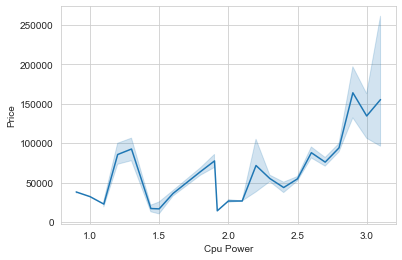

In [176]:
sns.lineplot(x=df_filtered[df_filtered['Processor']== 'Intel']['Cpu Power'].str.replace('GHz', '').astype('float32').sort_values(),
             y=df_filtered[df_filtered['Processor']== 'Intel']['Price'])
#df_filtered['Cpu Power'].str.replace('GHz', '')

In [177]:
df_filtered['Cpu Power'].str.replace('GHz', '').str.contains('0.9')

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Name: Cpu Power, Length: 1303, dtype: bool

In [178]:
df_filtered[df_filtered['Cpu Power'].str.contains('3.1')][['Cpu Power', 'Price']].groupby('Cpu Power').mean()

,Price
Cpu Power,
3.1GHz,155268.576


In [179]:
df_filtered[['Cpu Type', 'Cpu Power', 'Processor', 'Processor Power']]

,Cpu Type,Cpu Power,Processor,Processor Power
0,Intel Core i5,2.3GHz,Intel,Core i5
1,Intel Core i5,1.8GHz,Intel,Core i5
2,Intel Core i5,2.5GHz,Intel,Core i5
3,Intel Core i7,2.7GHz,Intel,Core i7
4,Intel Core i5,3.1GHz,Intel,Core i5
...,...,...,...,...
1298,Intel Core i7,2.5GHz,Intel,Core i7
1299,Intel Core i7,2.5GHz,Intel,Core i7
1300,Intel Celeron Dual Core,1.6GHz,Intel,Celeron Dual Core
1301,Intel Core i7,2.5GHz,Intel,Core i7


In [180]:
df_filtered[['Cpu Type', 'Cpu Power', 'Processor', 'Processor Power']]
# we can use types as Intel Core i5 / Core i3 / Core i7 / Other Intel / AMD. with CPU Power Column as separate

,Cpu Type,Cpu Power,Processor,Processor Power
0,Intel Core i5,2.3GHz,Intel,Core i5
1,Intel Core i5,1.8GHz,Intel,Core i5
2,Intel Core i5,2.5GHz,Intel,Core i5
3,Intel Core i7,2.7GHz,Intel,Core i7
4,Intel Core i5,3.1GHz,Intel,Core i5
...,...,...,...,...
1298,Intel Core i7,2.5GHz,Intel,Core i7
1299,Intel Core i7,2.5GHz,Intel,Core i7
1300,Intel Celeron Dual Core,1.6GHz,Intel,Celeron Dual Core
1301,Intel Core i7,2.5GHz,Intel,Core i7


In [181]:
df_filtered['Cpu Power'].value_counts()

 2.5GHz     290
 2.7GHz     165
 2.8GHz     165
 1.6GHz     133
 2.3GHz      86
 1.8GHz      78
 2.6GHz      76
 2GHz        67
 1.1GHz      53
 2.4GHz      52
 2.9GHz      21
 3GHz        19
 2.0GHz      19
 1.2GHz      15
 1.44GHz     12
 2.2GHz      11
 1.5GHz      10
 1.3GHz       6
 3.6GHz       5
 0.9GHz       4
 3.1GHz       3
 2.1GHz       3
 2.50GHz      3
 1.9GHz       2
 1.60GHz      1
 3.2GHz       1
 1.0GHz       1
 1.92GHz      1
 2.70GHz      1
Name: Cpu Power, dtype: int64

In [182]:
# Find PPI and then apply models...
df_filtered = df_filtered.join(df['ScreenResolution'].str.extract(r'([0-9 x]+)$')[0].str.split('x', expand=True).rename(
    columns={0:'X Resolution', 1: 'Y Resolution'}))

In [183]:
# Pixel per inch
df_filtered['X Resolution'] = df_filtered['X Resolution'].astype('float32')
df_filtered['Y Resolution'] = df_filtered['Y Resolution'].astype('float32')
#df_filtered['PPI'] = df_filtered['Inches']

In [184]:
df_filtered['PPI'] = (df_filtered['X Resolution']**2 + df_filtered['Y Resolution']**2)**0.5 / df_filtered['Inches']

In [185]:
df_filtered.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power,X Resolution,Y Resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,NaN,NaN,NaN,True,False,Intel,Core i5,2560.0,1600.0,226.983009
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,NaN,128.0,NaN,NaN,NaN,Intel,Core i5,1440.0,900.0,127.677938
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,NaN,NaN,NaN,False,False,Intel,Core i5,1920.0,1080.0,141.212002


In [186]:
df_filtered.drop(columns = ['Inches', 'ScreenResolution'], inplace=True)

In [187]:
df_filtered.drop(columns= ['Cpu', 'Memory', 'DisplayType', 'DisplayResolution'], inplace=True)

In [188]:
df_filtered['Processor'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: Processor, dtype: int64

In [189]:
# Samsung is only 1, so we can drop this row...

In [190]:
df_filtered = df_filtered[df_filtered['Processor'] != 'Samsung']

In [191]:
df_filtered.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power,X Resolution,Y Resolution,PPI
0,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False,Intel,Core i5,2560.0,1600.0,226.983009
1,Apple,Ultrabook,8GB,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN,Intel,Core i5,1440.0,900.0,127.677938
2,HP,Notebook,8GB,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False,Intel,Core i5,1920.0,1080.0,141.212002
3,Apple,Ultrabook,16GB,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7GHz,512.0,NaN,NaN,NaN,True,False,Intel,Core i7,2880.0,1800.0,220.534620
4,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1GHz,256.0,NaN,NaN,NaN,True,False,Intel,Core i5,2560.0,1600.0,226.983009


In [192]:
df_filtered.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302],
           dtype='int64', length=1302)

In [193]:
df_filtered.drop(columns=['X Resolution', 'Y Resolution'], inplace=True)

In [194]:
df_filtered.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power,PPI
0,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009
1,Apple,Ultrabook,8GB,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN,Intel,Core i5,127.677938
2,HP,Notebook,8GB,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False,Intel,Core i5,141.212002
3,Apple,Ultrabook,16GB,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7GHz,512.0,NaN,NaN,NaN,True,False,Intel,Core i7,220.534620
4,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1GHz,256.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009


In [195]:
df_filtered['Cpu Type'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual Core      80
Intel Pentium Quad Core      27
Intel Core M                 18
AMD A9-Series                17
Intel Atom                   13
AMD A6-Series                11
AMD E-Series                  9
Intel Celeron Quad Core       8
AMD A12-Series                8
AMD A8-Series                 4
AMD Ryzen                     4
AMD A10-Series                4
Intel Pentium Dual Core       3
AMD FX                        2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1505M V6        2
Intel Xeon E3-1535M v6        1
Intel Xeon E3-1535M v5        1
Intel Core M m3               1
AMD A4-Series                 1
Name: Cpu Type, dtype: int64

In [196]:
def fetch_processor_name(val):
    if val == 'Intel Core i7' or val == 'Intel Core i5' or val == 'Intel Core i3':
        return val
    else:
        company_val = val.split()[0]
        if company_val == 'Intel':
            return 'Other Intel'
        elif company_val == 'AMD':
            return 'AMD'
        else:
            return 'Other'

In [197]:
df_filtered['Cpu Type'] = df_filtered['Cpu Type'].apply(fetch_processor_name)

In [198]:
df_filtered.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power,PPI
0,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009
1,Apple,Ultrabook,8GB,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN,Intel,Core i5,127.677938
2,HP,Notebook,8GB,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False,Intel,Core i5,141.212002
3,Apple,Ultrabook,16GB,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,2.7GHz,512.0,NaN,NaN,NaN,True,False,Intel,Core i7,220.534620
4,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,3.1GHz,256.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009


In [201]:
df_filtered.corr()

,Weight,Price,SSD,HDD,Flash Storage,Hybrid,PPI
Weight,1.000000,0.209867,-0.057249,0.168892,-0.261365,0.319176,-0.321883
Price,0.209867,1.000000,0.546269,0.215827,0.708438,0.062157,0.475368
SSD,-0.057249,0.546269,1.000000,0.133503,NaN,NaN,0.409951
HDD,0.168892,0.215827,0.133503,1.000000,NaN,NaN,0.239505
Flash Storage,-0.261365,0.708438,NaN,NaN,1.000000,NaN,0.405400
Hybrid,0.319176,0.062157,NaN,NaN,NaN,1.000000,0.821932
PPI,-0.321883,0.475368,0.409951,0.239505,0.405400,0.821932,1.000000


In [202]:
from sklearn.preprocessing import OneHotEncoder

In [233]:
df_filtered['Company'].unique().reshape(-1,1)

array([['Apple'],
       ['HP'],
       ['Acer'],
       ['Asus'],
       ['Dell'],
       ['Lenovo'],
       ['Chuwi'],
       ['MSI'],
       ['Microsoft'],
       ['Toshiba'],
       ['Huawei'],
       ['Xiaomi'],
       ['Vero'],
       ['Razer'],
       ['Mediacom'],
       ['Samsung'],
       ['Google'],
       ['Fujitsu'],
       ['LG']], dtype=object)

In [272]:
encode_company = OneHotEncoder(sparse=False, categories=[df_filtered['Company'].unique().tolist()])

In [274]:
# encode_company.categories

[['Apple',
  'HP',
  'Acer',
  'Asus',
  'Dell',
  'Lenovo',
  'Chuwi',
  'MSI',
  'Microsoft',
  'Toshiba',
  'Huawei',
  'Xiaomi',
  'Vero',
  'Razer',
  'Mediacom',
  'Samsung',
  'Google',
  'Fujitsu',
  'LG']]

In [275]:
df_company = pd.DataFrame(data=encode_company.fit_transform(df_filtered[['Company']]), index=df_filtered.index,
                         columns=df_filtered['Company'].unique().tolist())

In [292]:
# df_filtered.join(df_company)

In [279]:
#df_company.tail(3)

,Apple,HP,Acer,Asus,Dell,Lenovo,Chuwi,MSI,Microsoft,Toshiba,Huawei,Xiaomi,Vero,Razer,Mediacom,Samsung,Google,Fujitsu,LG
1300,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [280]:
# pd.get_dummies(df_filtered['Company'])

,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1299,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1301,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [285]:
df_filtered['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [283]:
encode_TypeName = OneHotEncoder(sparse=False, categories=[df_filtered['TypeName'].unique().tolist()])

In [286]:
df_TypeName =  encode_TypeName.fit_transform(df_filtered[['TypeName']])

In [288]:
df_TypeName = pd.DataFrame(data=df_TypeName, index=df_filtered.index, columns=df_filtered['TypeName'].unique())

In [294]:
df_filtered.join(df_TypeName).tail()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,...,Touchscreen,Processor,Processor Power,PPI,Ultrabook,Notebook,Netbook,Gaming,2 in 1 Convertible,Workstation
1298,Lenovo,2 in 1 Convertible,4GB,Intel HD Graphics 520,Windows 10,1.80,33992.64,Intel Core i7,2.5GHz,128.0,...,True,Intel,Core i7,157.350516,0.0,0.0,0.0,0.0,1.0,0.0
1299,Lenovo,2 in 1 Convertible,16GB,Intel HD Graphics 520,Windows 10,1.30,79866.72,Intel Core i7,2.5GHz,512.0,...,True,Intel,Core i7,276.053531,0.0,0.0,0.0,0.0,1.0,0.0
1300,Lenovo,Notebook,2GB,Intel HD Graphics,Windows 10,1.50,12201.12,Other Intel,1.6GHz,NaN,...,NaN,Intel,Celeron Dual Core,111.935207,0.0,1.0,0.0,0.0,0.0,0.0
1301,HP,Notebook,6GB,AMD Radeon R5 M330,Windows 10,2.19,40705.92,Intel Core i7,2.5GHz,NaN,...,NaN,Intel,Core i7,100.454673,0.0,1.0,0.0,0.0,0.0,0.0
1302,Asus,Notebook,4GB,Intel HD Graphics,Windows 10,2.20,19660.32,Other Intel,1.6GHz,NaN,...,NaN,Intel,Celeron Dual Core,100.454673,0.0,1.0,0.0,0.0,0.0,0.0


In [390]:
df_filtered['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [391]:
encode_OpSys = OneHotEncoder(sparse=False, categories=[df_filtered['OpSys'].unique().tolist()])

In [393]:
df_OpSys = encode_OpSys.fit_transform(df_filtered[['OpSys']])

In [394]:
df_OpSys = pd.DataFrame(data=df_OpSys, index=df_filtered.index, columns=df_filtered['OpSys'].unique())

In [398]:
df_OpSys.tail(3)

,macOS,No OS,Windows 10,Mac OS X,Linux,Android,Windows 10 S,Chrome OS,Windows 7
1300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1301,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1302,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [399]:
df_filtered.tail(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,...,Samsung,Google,Fujitsu,LG,Ultrabook,Notebook,Netbook,Gaming,2 in 1 Convertible,Workstation
1300,Lenovo,Notebook,2,Windows 10,1.50,12201.12,Other Intel,1.6,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1301,HP,Notebook,6,Windows 10,2.19,40705.92,Intel Core i7,2.5,NaN,1000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1302,Asus,Notebook,4,Windows 10,2.20,19660.32,Other Intel,1.6,NaN,500.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [304]:
# Ram
df_filtered['Ram'] = df_filtered['Ram'].str.replace('GB', '').astype('int32')

<AxesSubplot:>

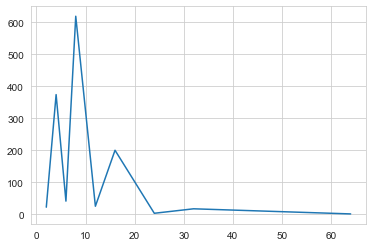

In [306]:
df_filtered['Ram'].value_counts().sort_index().plot()

<AxesSubplot:xlabel='Ram', ylabel='Price'>

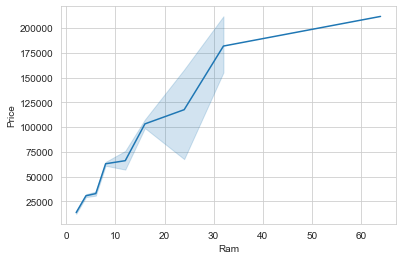

In [309]:
sns.lineplot(x=df_filtered['Ram'], y=df_filtered['Price'])

In [314]:
# GPU
df_filtered['Gpu Brand'] = df_filtered['Gpu'].apply(lambda x: x.split()[0])

In [317]:
df_filtered['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

In [318]:
df_filtered.drop(columns=['Gpu'], inplace=True)

In [321]:
df_filtered.head(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power,PPI,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN,Intel,Core i5,127.677938,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False,Intel,Core i5,141.212002,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,Intel Core i7,2.7GHz,512.0,NaN,NaN,NaN,True,False,Intel,Core i7,220.534620,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,Intel Core i5,3.1GHz,256.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009,Intel


In [322]:
# One Hot encoder for GPU brand
encode_gpu_brand = OneHotEncoder(sparse=False, categories=[df_filtered['Gpu Brand'].unique().tolist()])

In [325]:
df_gpu_brand = encode_gpu_brand.fit_transform(df_filtered[['Gpu Brand']])

In [326]:
df_gpu_brand = pd.DataFrame(df_gpu_brand, index=df_filtered.index, columns=df_filtered['Gpu Brand'].unique())

In [512]:
df_gpu_brand.rename(columns={'Intel': 'Intel GPU', 'AMD': 'AMD GPU', 'Nvidia': 'Nvidia GPU'}, inplace=True)

In [513]:
df_gpu_brand.head(3)

,Intel GPU,AMD GPU,Nvidia GPU
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


In [332]:
df_filtered.head(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power,PPI,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN,Intel,Core i5,127.677938,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False,Intel,Core i5,141.212002,Intel


In [335]:
# df_filtered.join(df_gpu_brand)

In [336]:
df_filtered['Cpu Type'].value_counts()

Intel Core i7    527
Intel Core i5    423
Other Intel      154
Intel Core i3    136
AMD               62
Name: Cpu Type, dtype: int64

In [339]:
df_filtered['Cpu Type'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD', 'Intel Core i3',
       'Other Intel'], dtype=object)

In [337]:
encode_cpu_type = OneHotEncoder(sparse=False, categories=[df_filtered['Cpu Type'].unique().tolist()])

In [340]:
df_cpu_type = encode_cpu_type.fit_transform(df_filtered[['Cpu Type']])

In [341]:
df_cpu_type = pd.DataFrame(data=df_cpu_type, index=df_filtered.index, columns=df_filtered['Cpu Type'].unique())

In [348]:
df_cpu_type.head(3)

,Intel Core i5,Intel Core i7,AMD,Intel Core i3,Other Intel
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0


In [349]:
df_filtered.head(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power,PPI,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN,Intel,Core i5,127.677938,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False,Intel,Core i5,141.212002,Intel


In [351]:
# df_filtered.join(df_cpu_type)

In [352]:
df_filtered.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,Processor,Processor Power,PPI,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,2.3GHz,128.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,1.8GHz,NaN,NaN,128.0,NaN,NaN,NaN,Intel,Core i5,127.677938,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,2.5GHz,256.0,NaN,NaN,NaN,False,False,Intel,Core i5,141.212002,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,Intel Core i7,2.7GHz,512.0,NaN,NaN,NaN,True,False,Intel,Core i7,220.534620,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,Intel Core i5,3.1GHz,256.0,NaN,NaN,NaN,True,False,Intel,Core i5,226.983009,Intel


In [355]:
# Cpu Power
df_filtered['Cpu Power'] = df_filtered['Cpu Power'].str.replace('GHz', '').astype('float32')

In [514]:
# to keep a backup copy of df
df_filtered_copy = df_filtered.copy()
# df_filtered = df_filtered_copy.copy()

In [515]:
df_filtered.drop(columns=['Processor', 'Processor Power'], inplace=True)

In [516]:
df_filtered.head(3)

,Company,TypeName,Ram,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,PPI,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,2.3,128.0,NaN,NaN,NaN,True,False,226.983009,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,1.8,NaN,NaN,128.0,NaN,NaN,NaN,127.677938,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,2.5,256.0,NaN,NaN,NaN,False,False,141.212002,Intel


In [517]:
df_filtered['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

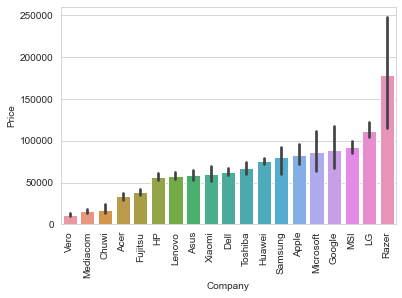

In [518]:
sns.barplot(data=df_filtered, x= 'Company', y='Price', 
            order=df_filtered.groupby('Company')['Price'].mean().sort_values().index)
plt.xticks(rotation='vertical')
plt.show()

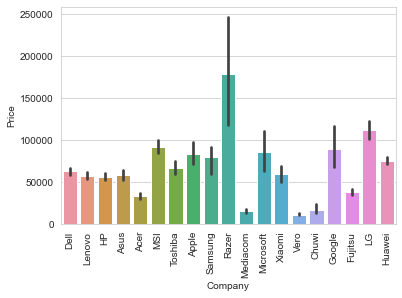

In [519]:
sns.barplot(data=df_filtered, x= 'Company', y='Price', 
            order=df_filtered['Company'].value_counts().index)
plt.xticks(rotation='vertical')
plt.show()

In [520]:
df_filtered.groupby('Company')['Price'].mean().sort_values()

Company
Vero          11584.404000
Mediacom      15717.600000
Chuwi         16745.726400
Acer          33394.615969
Fujitsu       38841.120000
HP            56891.044222
Lenovo        57882.563200
Asus          58830.143878
Xiaomi        60390.882000
Dell          63193.755782
Toshiba       67549.050000
Huawei        75870.720000
Samsung       80332.920000
Apple         83340.499886
Microsoft     85903.788000
Google        89386.080000
MSI           92116.226133
LG           111834.720000
Razer        178282.491429
Name: Price, dtype: float64

In [521]:
# Company
# For Company we can either convert the companies <= 5 to other categories
# In the first iteration I am not doing it because the price points for these bottom categories vary alot

In [522]:
df_filtered = df_filtered.join(df_company)

In [523]:
# Type Name
df_filtered = df_filtered.join(df_TypeName)

In [524]:
# GPU 
df_filtered = df_filtered.join(df_gpu_brand)

In [525]:
# OpSys
df_filtered = df_filtered.join(df_OpSys)

In [526]:
df_filtered.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Cpu Type,Cpu Power,SSD,HDD,...,Nvidia GPU,macOS,No OS,Windows 10,Mac OS X,Linux,Android,Windows 10 S,Chrome OS,Windows 7
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,2.3,128.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,1.8,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,2.5,256.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,Intel Core i7,2.7,512.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,Intel Core i5,3.1,256.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [527]:
# Cpu Type
df_filtered = df_filtered.join(df_cpu_type)

In [528]:
values = {'SSD': 0, 'HDD': 0, 'Flash Storage': 0, 'Hybrid':0, 'PPI':0, 'Gpu Brand':0}

In [529]:
# df_filtered[['SSD', 'HDD', 'Flash Storage', 'Hybrid', 'IPS','Touchscreen', 'PPI', 'Gpu Brand']].fillna(0, inplace=True)

In [530]:
df_filtered.fillna(value=values, inplace=True)

In [531]:
values_false = {'IPS':False,'Touchscreen':False}

In [532]:
df_filtered.fillna(value=values_false, inplace=True)

In [533]:
df_filtered.drop(columns='Cpu Type', inplace=True)

In [534]:
df_filtered.drop(columns=['Company', 'TypeName', 'OpSys'], inplace=True)

In [546]:
df_filtered.drop(columns=['Gpu Brand'], inplace=True)

In [547]:
df_filtered.columns

Index(['Ram', 'Weight', 'Price', 'Cpu Power', 'SSD', 'HDD', 'Flash Storage',
       'Hybrid', 'IPS', 'Touchscreen', 'PPI', 'Apple', 'HP', 'Acer', 'Asus',
       'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei',
       'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu',
       'LG', 'Ultrabook', 'Notebook', 'Netbook', 'Gaming',
       '2 in 1 Convertible', 'Workstation', 'Intel GPU', 'AMD GPU',
       'Nvidia GPU', 'macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Android', 'Windows 10 S', 'Chrome OS', 'Windows 7', 'Intel Core i5',
       'Intel Core i7', 'AMD', 'Intel Core i3', 'Other Intel'],
      dtype='object')

In [548]:
df_filtered['Touchscreen'] = df_filtered['Touchscreen'].apply(lambda x: False if x == 0 else x)

In [549]:
df_filtered['IPS'] = df_filtered['IPS'].apply(lambda x: False if x == 0 else x)

In [550]:
df_filtered.head()

,Ram,Weight,Price,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,...,Linux,Android,Windows 10 S,Chrome OS,Windows 7,Intel Core i5,Intel Core i7,AMD,Intel Core i3,Other Intel
0,8,1.37,71378.6832,2.3,128.0,0.0,0.0,0.0,True,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8,1.34,47895.5232,1.8,0.0,0.0,128.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,8,1.86,30636.0000,2.5,256.0,0.0,0.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16,1.83,135195.3360,2.7,512.0,0.0,0.0,0.0,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8,1.37,96095.8080,3.1,256.0,0.0,0.0,0.0,True,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [551]:
X = df_filtered.drop('Price', axis=1).copy()
y = df_filtered['Price'].copy()

In [552]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=36)

In [554]:
model = LinearRegression()

In [555]:
model.fit(X_train, y_train)

LinearRegression()

In [556]:
predictions = model.predict(X_test)

In [560]:
from sklearn.metrics import r2_score

In [561]:
print(r2_score(predictions, y_test.values))

0.7267681796459298


In [562]:
print(r2_score(y_test.values, predictions))

0.7818706317760264


<AxesSubplot:>

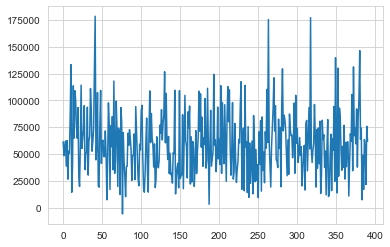

In [578]:
sns.lineplot(y = predictions, x = [i for i in range(0,len(predictions))])

<AxesSubplot:ylabel='Price'>

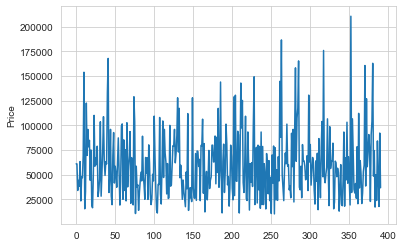

In [577]:
sns.lineplot(y = y_test, x = [i for i in range(0,len(y_test))])

In [580]:
prediction_series = pd.Series(predictions, index=y_test.index)

In [582]:
prediction_series[prediction_series < 0]

31   -5977.029584
dtype: float64

In [586]:
X_test.loc[31]

Ram                            2
Weight                      1.65
Cpu Power                    1.5
SSD                          0.0
HDD                          0.0
Flash Storage               32.0
Hybrid                       0.0
IPS                        False
Touchscreen                False
PPI                   111.935207
Apple                        0.0
HP                           0.0
Acer                         0.0
Asus                         1.0
Dell                         0.0
Lenovo                       0.0
Chuwi                        0.0
MSI                          0.0
Microsoft                    0.0
Toshiba                      0.0
Huawei                       0.0
Xiaomi                       0.0
Vero                         0.0
Razer                        0.0
Mediacom                     0.0
Samsung                      0.0
Google                       0.0
Fujitsu                      0.0
LG                           0.0
Ultrabook                    0.0
Notebook  

In [587]:
y_test[31]

10602.72

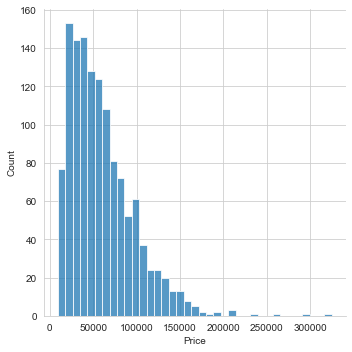

In [590]:
sns.displot(df_filtered['Price'])
# The values are skewed. it can disturb the algorithm and hence we need to scale the values...

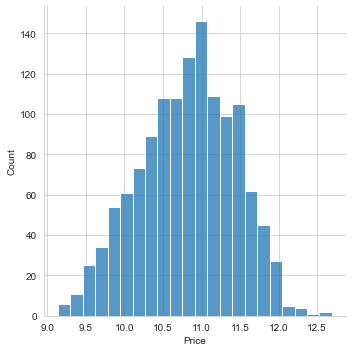

In [591]:
sns.displot(np.log(df_filtered['Price']))
# Now it's a bit normal...

In [592]:
# Skewed Price - what issue it creates?
# skewed data points are treated as outlier from the tail region and outlier are not good for model performance
# a skewed data can be an issue for the model because it can disturb the model performance / will be treated
# as an outlier. Tree based models are robust enough towards extreme values and having such models can handle 
# the extreme values / outliers.

In [593]:
# Since we're using a couple of linear model models, it's better to normalize the data using log transformation


In [594]:
df_filtered['Price Normalized'] = np.log(df_filtered['Price'])

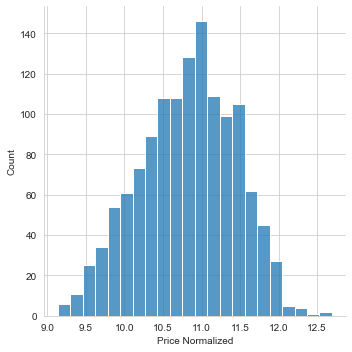

In [596]:
sns.displot(df_filtered['Price Normalized'])

In [597]:
X_normalized = df_filtered.drop(columns=['Price', 'Price Normalized'])
y_normalized = df_filtered['Price Normalized']

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.3, random_state=36)

In [599]:
model_normalized = LinearRegression()

In [600]:
model_normalized.fit(X_train, y_train)

LinearRegression()

In [601]:
predictions_normalized = model_normalized.predict(X_test)

In [608]:
print(r2_score(y_test, predictions_normalized))

0.827679028625391


In [605]:
# R2 Score
# Sum of squared Regression Explained / Sum of Squared Regression Total
# SS (explained) / SS (total)
# 1 - Rss / Tss

In [611]:
RSS = sum((y_test - predictions_normalized)**2)
# sum of square of Residuals

In [616]:
TSS = sum((y_test - y_test.mean())**2)
# Total sum of Squares

In [618]:
1 - (RSS / TSS)

0.8276790286253908

In [620]:
# 0.8276790286253908
# 0.827679028625391

In [621]:
from sklearn.metrics import mean_absolute_error

In [622]:
mean_absolute_error(y_test, predictions_normalized)

0.19443895594695207

In [630]:
predictions_normalized[np.exp(predictions_normalized) < 5000]

array([], dtype=float64)

In [637]:
y_test[np.exp(y_test) < 11000]

31     9.268866
290    9.268866
20     9.232535
Name: Price Normalized, dtype: float64

In [638]:
np.exp(9.268866)

10602.72158026527

In [640]:
df_filtered['Price'].min()

9270.72

In [642]:
np.exp(df_filtered['Price Normalized'].min())

9270.720000000001

In [644]:
df_filtered[df_filtered['Price'] <= 9270.72]

,Ram,Weight,Price,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,...,Android,Windows 10 S,Chrome OS,Windows 7,Intel Core i5,Intel Core i7,AMD,Intel Core i3,Other Intel,Price Normalized
1215,2,1.3,9270.72,1.5,32.0,0.0,0.0,0.0,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9.134616


In [655]:
np.exp(y_test[np.exp(y_test) < 11000])

31     10602.720
290    10602.720
20     10224.432
Name: Price Normalized, dtype: float64

In [650]:
predictions_normalized_series = pd.Series(predictions_normalized, index=y_test.index)

In [654]:
np.exp(predictions_normalized_series.loc[[31,290,20]])

31     17899.092153
290    16057.262911
20     18016.931010
dtype: float64

In [656]:
np.exp(y_test)

337     60952.320
426     60867.072
1284    33992.640
573     44222.400
582     38308.320
          ...    
344     84129.120
183     42251.040
1183    17742.240
549     92121.120
234     36709.920
Name: Price Normalized, Length: 391, dtype: float64

In [657]:
np.exp(predictions_normalized_series)

337     53205.450188
426     48996.793207
1284    56985.052116
573     50073.326004
582     34620.291844
            ...     
344     63465.107344
183     50418.738705
1183    18403.787650
549     67210.594855
234     56560.288286
Length: 391, dtype: float64

In [658]:
r2_score(np.exp(y_test), np.exp(predictions_normalized))

0.7151383860816867

In [659]:
# Mean Absolute Error
# The mean of absolute difference / error on overall instances of the test set...
# mean_absolute_error = sigma(y_actual - y_predicted) / n
# n=> number of predictions

In [660]:
mean_absolute_error(y_test, predictions_normalized)

0.19443895594695207

In [661]:
mean_absolute_error(np.exp(y_test), np.exp(predictions_normalized))

11904.07737726666

### Second Iteration...

In [668]:
df_filtered.columns

Index(['Ram', 'Weight', 'Price', 'Cpu Power', 'SSD', 'HDD', 'Flash Storage',
       'Hybrid', 'IPS', 'Touchscreen', 'PPI', 'Apple', 'HP', 'Acer', 'Asus',
       'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei',
       'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu',
       'LG', 'Ultrabook', 'Notebook', 'Netbook', 'Gaming',
       '2 in 1 Convertible', 'Workstation', 'Intel GPU', 'AMD GPU',
       'Nvidia GPU', 'macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Android', 'Windows 10 S', 'Chrome OS', 'Windows 7', 'Intel Core i5',
       'Intel Core i7', 'AMD', 'Intel Core i3', 'Other Intel',
       'Price Normalized'],
      dtype='object')

<AxesSubplot:>

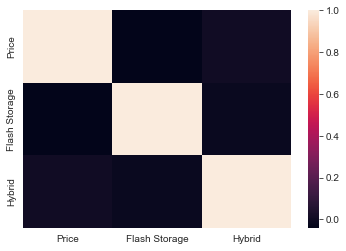

In [669]:
sns.heatmap(df_filtered[['Price', 'Flash Storage', 'Hybrid']].corr())

In [682]:
# dropping Flask Storage / Hybrid in the next iterations...
X_2 = df_filtered.drop(columns=['Flash Storage', 'HDD', 'Price', 'Price Normalized'])
y_2 = df_filtered['Price Normalized']

In [683]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=36)

In [684]:
model_2 = LinearRegression()

In [685]:
model_2.fit(X_train_2, y_train_2)

LinearRegression()

In [687]:
predictions_2 = model_2.predict(X_test_2)

In [689]:
predictions_2_series = pd.Series(predictions_2, index=y_test_2.index)

In [693]:
np.exp(predictions_2_series)

337     53339.658381
426     47268.061235
1284    57558.866933
573     50264.180373
582     34917.052877
            ...     
344     63812.710744
183     50679.077972
1183    18526.645190
549     66836.068174
234     56712.863408
Length: 391, dtype: float64

In [694]:
np.exp(y_test_2)

337     60952.320
426     60867.072
1284    33992.640
573     44222.400
582     38308.320
          ...    
344     84129.120
183     42251.040
1183    17742.240
549     92121.120
234     36709.920
Name: Price Normalized, Length: 391, dtype: float64

In [695]:
r2_score(np.exp(y_test_2), np.exp(predictions_2))

0.7148258375078416

In [696]:
mean_absolute_error(np.exp(y_test_2), np.exp(predictions_2))

11901.297890826574

In [700]:
from sklearn.ensemble import RandomForestRegressor

In [701]:
random_regressor = RandomForestRegressor(max_depth=8)

In [702]:
random_regressor.fit(X_train_2, y_train_2)

RandomForestRegressor(max_depth=8)

In [704]:
random_predictions = random_regressor.predict(X_test_2)

In [708]:
r2_score(np.exp(y_test_2), np.exp(random_predictions))

0.7579726753432877

In [709]:
mean_absolute_error(np.exp(y_test_2), np.exp(random_predictions))

10950.35968304171

### Why random forest regressors are not the best in extrapolation situations?
##### Random forests cannot extrapolate a value i.e. the prediction range can never exceed the range of the training data. Forexample, if the range of Price here is between 10,000 - 350,000 then for any unseen data (regardless of the extra ordinary laptop features) the random forest model will predict the value only in the range of 10,000 - 350,000  (let's say the actual price should have been 500,000).

#### What is the solution???
#### In such cases where you need to extrapolate (predict future results -  based on variation in data) you should use linear models like Linear regression, SVM regression etc.

#### To use random forest, you can combine predictors using "stacking". Forexample, creating a stack of Linear Regression and Random Forest Regressor etc. So the result would be the average of prediction of stack used.


https://neptune.ai/blog/random-forest-regression-when-does-it-fail-and-why

Fundamentals of Linear Regression:
https://courses.analyticsvidhya.com/courses/take/Fundamentals-of-Regression-Analysis/texts/10627945-what-is-regression-analysis

In [710]:
df_filtered

,Ram,Weight,Price,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,...,Android,Windows 10 S,Chrome OS,Windows 7,Intel Core i5,Intel Core i7,AMD,Intel Core i3,Other Intel,Price Normalized
0,8,1.37,71378.6832,2.3,128.0,0.0,0.0,0.0,True,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.175755
1,8,1.34,47895.5232,1.8,0.0,0.0,128.0,0.0,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.776777
2,8,1.86,30636.0000,2.5,256.0,0.0,0.0,0.0,False,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.329931
3,16,1.83,135195.3360,2.7,512.0,0.0,0.0,0.0,True,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.814476
4,8,1.37,96095.8080,3.1,256.0,0.0,0.0,0.0,True,False,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.473101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,2.5,128.0,0.0,0.0,0.0,True,True,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.433899
1299,16,1.30,79866.7200,2.5,512.0,0.0,0.0,0.0,True,True,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.288115
1300,2,1.50,12201.1200,1.6,0.0,0.0,64.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.409283
1301,6,2.19,40705.9200,2.5,0.0,1000.0,0.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.614129


In [711]:
# Stacking???
# 

In [712]:
model.coef_

array([ 2.53282379e+03,  9.02331702e+03,  1.09161932e+04,  4.50565974e+01,
        7.97395081e-01,  3.15783878e+01,  6.63443647e-01,  1.67843275e+03,
       -5.41475839e+03,  1.19123544e+02,  3.51377284e+03, -8.01947875e+02,
       -1.09740521e+04, -6.44946004e+03, -3.87144600e+03, -4.30586769e+03,
       -1.91632385e+04,  2.45643875e+03, -2.26502929e+02,  3.33768889e+03,
       -1.31419399e+04, -5.45815644e+03, -1.44010864e+04,  4.79414261e+04,
       -1.55450530e+04,  4.60547943e+03,  2.15255638e+04, -1.43237060e+04,
        2.52820871e+04,  5.27397413e+02, -1.38550192e+04, -8.05276522e+03,
       -6.48900443e+03,  1.85572215e+03,  2.60136693e+04,  3.31283251e+03,
       -3.33745251e+03,  2.46199982e+01,  5.03207289e+03, -1.26186159e+04,
       -1.66267008e+02, -1.51830005e+03, -5.76265746e+03, -1.47034261e+04,
        1.36833084e+04, -3.12644138e+03,  1.91803267e+04,  3.57575665e+03,
        4.81321913e+03, -9.61711379e+03, -1.89510251e+03,  3.12324052e+03])

In [713]:
X_train

,Ram,Weight,Cpu Power,SSD,HDD,Flash Storage,Hybrid,IPS,Touchscreen,PPI,...,Linux,Android,Windows 10 S,Chrome OS,Windows 7,Intel Core i5,Intel Core i7,AMD,Intel Core i3,Other Intel
100,8,1.910,2.7,256.0,0.0,0.0,0.0,False,False,141.212002,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
384,16,1.100,2.7,512.0,0.0,0.0,0.0,False,True,165.632122,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1111,4,2.240,2.3,0.0,500.0,0.0,0.0,False,False,100.454673,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
348,4,1.500,1.1,0.0,0.0,32.0,0.0,False,True,135.094215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80,8,1.880,1.6,256.0,0.0,0.0,0.0,True,False,141.212002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,8,2.591,2.6,256.0,1000.0,0.0,0.0,True,False,141.212002,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
936,4,2.180,2.0,0.0,1000.0,0.0,0.0,False,False,100.454673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
926,8,1.360,2.7,256.0,0.0,0.0,0.0,True,False,176.232578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
610,32,2.500,3.1,1000.0,0.0,0.0,0.0,True,False,282.424003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [714]:
predictions

array([ 61352.74031471,  48448.07112598,  56723.70338725,  61999.54632521,
        38642.57359736,  62372.30732648,  26439.78722146,  52552.79899872,
        50586.01661507,  84553.06991697, 133334.09327217,  14237.96934438,
        39383.89614639, 113524.91319349,  64773.44195578, 108968.033766  ,
       100122.31657116,  74825.64293912,  64591.08352561,  93267.05489627,
        29463.48864402,  19638.48178465,  57578.06732772, 114175.8482882 ,
        55093.58999125,  64691.53953329,  71928.09858264,  94971.53704995,
        35379.09969519,  50039.55317959,  51555.74717105,  93575.52784548,
        30236.14500434,  61870.07016749,  66514.10837037, 110988.24149908,
        91836.76275051,  52542.34654285,  61603.04308431,  73284.45724879,
       124896.35572119, 178467.29042453,  44446.49697905,  58040.1231506 ,
       107247.4814738 ,  20209.81671085,  18919.14152187,  75779.28682054,
       109303.25709715,  41124.31668509,  60487.58617324,  62813.50599157,
        47572.83062045,  